In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.lines as mlines

In [2]:
## load data
death = pd.read_csv('tidytuesday/data/2018/2018-11-13/malaria_deaths.csv')
death_age = pd.read_csv('tidytuesday/data/2018/2018-11-13/malaria_deaths_age.csv')
inc = pd.read_csv('tidytuesday/data/2018/2018-11-13/malaria_inc.csv')

In [3]:
joined_df = inc.merge(death, on=('Entity', 'Year'), how='inner')
joined_df = joined_df.rename(columns = {'Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)':'Incidence',
                           'Deaths - Malaria - Sex: Both - Age: Age-standardized (Rate) (per 100,000 people)': 'Deaths'})

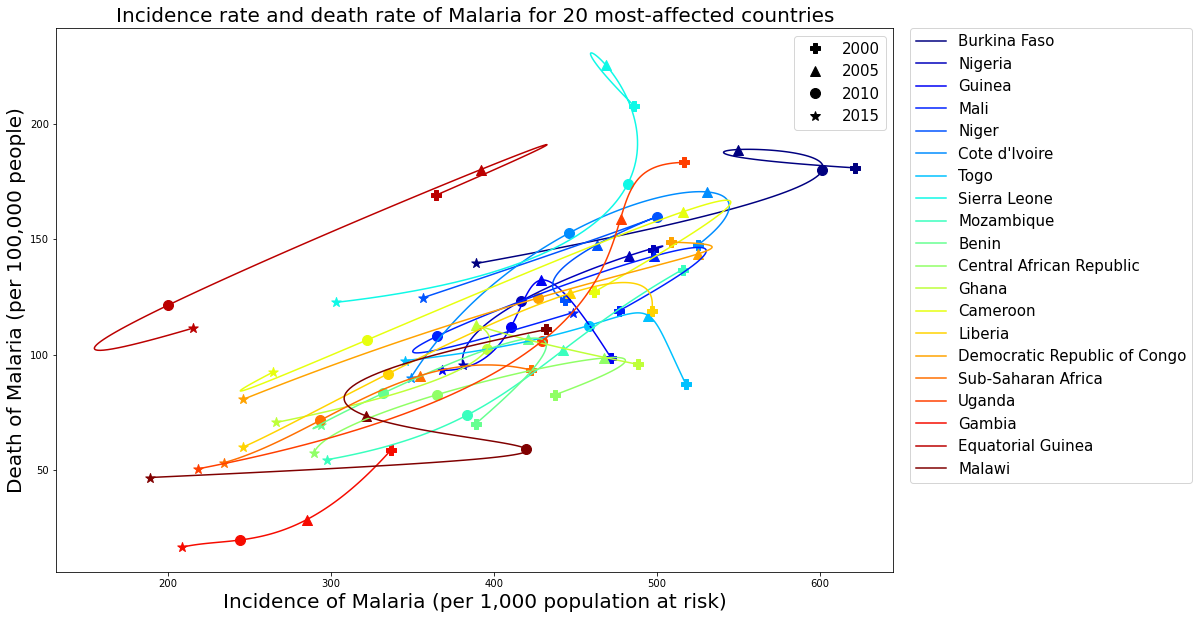

In [4]:
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

markers = ['P', '^', 'o', '*']
countries = joined_df.groupby('Entity').min().nlargest(20, 'Incidence').index
colors = dict(zip(countries, plt.cm.jet(np.linspace(0, 1, len(countries)))))

for country, color in colors.items():
    df = joined_df[joined_df['Entity'] == country]
    for i in range(4):
        ax.scatter(df['Incidence'].iloc[i], df['Deaths'].iloc[i], color = color, marker = markers[i], s = 100)
    x = np.array(df['Incidence'])
    y = np.array(df['Deaths'])
    y_smooth = make_interp_spline([2000, 2005, 2010, 2015], np.c_[x, y])(np.linspace(2000, 2015, 100))
    ax.plot(*y_smooth.T, color = color, label = country)

ax.set_xlabel('Incidence of Malaria (per 1,000 population at risk)', fontsize=20)
ax.set_ylabel('Death of Malaria (per 100,000 people)', fontsize=20)
ax.set_title('Incidence rate and death rate of Malaria for 20 most-affected countries', fontsize=20)
leg1 = ax.legend(handles=[
        mlines.Line2D([], [], color='black', marker='P', linestyle='None', label='2000', markersize = 10), 
        mlines.Line2D([], [], color='black', marker='^', linestyle='None', label='2005', markersize = 10), 
        mlines.Line2D([], [], color='black', marker='o', linestyle='None', label='2010', markersize = 10), 
        mlines.Line2D([], [], color='black', marker='*', linestyle='None', label='2015', markersize = 10)],
                prop={'size': 15})
leg2 = ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, prop={'size': 15})
ax.add_artist(leg1)
pass